# 第 14 章 统计分析

**本章内容提要**:

- 数据的概括性度量
- 统计分布
- 假设检验

统计学是关于认识客观现象总体数量特征和数量关系的科学。一些常见的概念早已深入到生活的各个方面，如求和、求均值、相关性等。不同的领域中统计分析的重要性不太一样。不管怎样，掌握基础的统计分析方法是有必要的。本章将介绍一些描述性统计、统计分布和假设检验的基本理论和在 Python 中的实现。

## 14.1 概括性度量

对于两组数据，我们常常无法通过一对一的比较来得出它们的关系（如大或小）。为了了解和比较数据的分布情况，我们需要提取数据分布的特征。我们一般从三个方面对数据分布的特征进行描述：

- 分布的集中趋势：反映了数据点向其中心值聚集的程度。
- 分布的离散程度：反映了数据点远离中心值的程度。
- 分布的形状：反映数据分布偏斜的程度和峰度。

接下来逐一介绍它们，我们依旧使用 mtcars 数据集进行探究，先导入需要的库和数据。

In [3]:
import statistics as st # 标准库
import numpy as np
import pandas as pd
mtcars = pd.read_csv('files/chapter11/mtcars.csv')

### 14.1.1 集中趋势的度量

集中趋势反映了一组数据中心点的所在位置。不同的数据类型使用的集中趋势度量不同。

- 分类数据：众数
- 顺序数据：中位数、众数
- 数值数据：均值（平均数）、中位数、众数

Python 标准库、NumPy 库和 Pandas 库都有计算实现。

#### 均值

均值反映总体的一般水平，有算数平均数、几何平均数等几种类型。

算数平均数最为常用，它是一组数据总和与数量的比值。

In [6]:
st.mean([1, 2, 3])  # 标准库计算
np.mean([1, 2, 3])  # NumPy 库计算
pd.Series([1, 2, 3]).mean()  # Pandas 库计算

2.0

几何平均数又称为对数平均数，它是若干项值连乘积开其项数次方的算术根，常用于计算当各数据值的连乘积等于总比率或总速度时的平均比率或平均速度，如计算投资的年利率。如果数据存在 0 值，几何平均数无效。

Python 标准库需要 3.8 版本后才有几何平均数计算函数。NumPy 库没有该函数的实现，我们可以根据定义自己写个函数。

In [14]:
def geo_mean(iterable):
    a = np.log(iterable)
    return np.exp(a.sum()/len(a))

In [15]:
geo_mean([1, 2, 3])

1.8171205928321397

我们可以导入 SciPy 库中的计算函数进行验证。SciPy 是著名的科学计算库，提供了一系列的统计分析功能。

读者可以在终端中使用以下命令之一安装 SciPy 库：

```bash
# 安装方法 1
conda install scipy
# 安装方法 2
pip install scipy
```

In [16]:
from scipy.stats.mstats import gmean
gmean([1, 2, 3])

1.8171205928321397

#### 中位数

中位数是一组数据中间位置的值，它不受极端值的影响。

In [18]:
st.median([1, 2, 1000])
np.median([1, 2, 1000])

2.0

注意，当数据有偶数项时，中位数是最中间两个数的平均值。

In [19]:
pd.Series([1, 2, 3, 1000]).median()

2.5

#### 众数

众数是一组数据中出现次数最多的值，不受极端值影响。它的断点是不容易确定，可能有一个众数，也可能有多个众数。如果数据是均匀分布，那么没有众数。

检测众数推荐使用 Pandas 的 mode() 方法，Python 标准库中的 mode() 函数无法检测有多个众数的情况。

In [23]:
pd.Series([1, 2, 2, 3, 3, 5]).mode()

0    2
1    3
dtype: int64

平均数、中位数与众数三者的关系与总体分布的特征有关，读者可以参考以下标准进行选择。

- 当数据呈对称分布时，三个代表值相等或者接近相等，这时则应选择均值作为集中趋势的代表值。
- 当数据中存在极端值时，平均数易受极端值的影响使得数据发生偏斜，对于偏态分布的数据，平均数代表性较差。因此当数据为偏态分布，特别是偏斜程度较大时，可以考虑使用中位数或者众数，这时他们的代表性都比平均数好。

### 14.1. 2 离散程度的度量

集中趋势反映的是数据的平均水平，探究的是共性，看不出一组数据内部的差异。研究组内的差异需要通过离散程度进行测量。测量离散程度的方法有极差、方差和标准差等。

#### 极差

极差就是一组数据内最大值减去最小值，这个计算很容易，使用不多。

In [24]:
a = [1, 2, 3, 1000]
max(a) - min(a)

999

#### 方差

方差是一组数据与其平均数的离差平方和除以自由度，其中数据量减 1 称为自由度。自由度是指附加给独立的观测值的约束或者限制。比如一组数据 a、b、c，一旦均值确定，那么 3 个数据中只有两个值可以自由选择。



In [31]:
pd.Series([1, 2, 3, 1]).var()

0.9166666666666666

In [30]:
pd.Series([1, 2, 3, 1000]).var()

249001.66666666666

虽然只改变了一个数据，但上面的方差发生了极大的变化。

#### 标准差

标准差是方差的平方根，与方差相比，标准差的单位跟数据的计量单位相同。因此标准差是测量数值型数据离散程度最重要也是最常用的指标。



In [32]:
pd.Series([1, 2, 3, 1]).std()

0.9574271077563381

数据分析之前探究数据的分布是比较重要的，Pandas 库提供了 describe() 方法直接对整个 DataFrame 对象描述性统计量计算，其中最重要的两个指标便是均值（算数平均数）和方差。

In [33]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### 14.1.3 偏态与峰态的度量

前面介绍了集中趋势和离散程度这两个数据分布的重要特征，读者如果想要全面了解数据的特点，还要知道数据分布的形态是否对称、偏斜的程度等。

#### 偏态

偏态是对数据分布对称性的度量。如果数据分布是对称的，那么偏态系数为在 -1 和 1 之间，完全对称时为 0；偏态系数为正值时为右偏分布，为负值时为左偏分布。

我们看下 mtcars 数据集中展示的汽车重量的偏态如何。

In [34]:
mtcars.wt.skew()

0.4659161067929868

不难推断出该重量分布大致是对称的，不过有稍微的右偏。接下来我们使用核密度图验证一下。

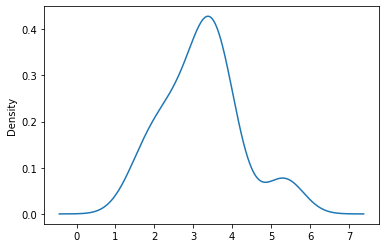

In [41]:
%matplotlib inline
mtcars.wt.plot(kind='kde')

#### 峰态

峰态是对数据分布平峰或者尖峰程度的测量。通常与标准正态分布相比较，即均值为 0，标准差为 1 的分布。如果一组数据服从标准正态分布，那么峰态系数为 0；若峰态系数大于 0，则分布更尖，也意味着数据更为集中；若峰态系数小于 0，则分布更平，数据分布更分散。

由此可以推断，汽车重量的分布峰态应该与 0 接近，可能大于 0，我们计算看看。

In [36]:
mtcars.wt.kurtosis()

0.41659466963492564

那么分散的分布的峰态是怎么样的呢？我们选择 cyl 变量进行计算和可视化。

In [45]:
mtcars.cyl.kurtosis()

-1.7627938970111958

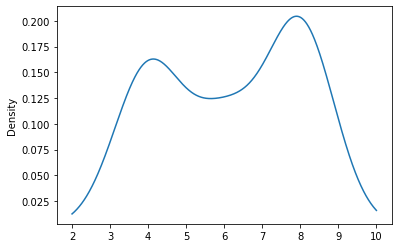

In [46]:
mtcars.cyl.plot(kind='kde')

## 14.2 统计分布

人们在生活实践中发现，不同变量数据分布的形状和变化是有规律的，例如人的年龄、身高分布，都是两头低，中间高。历史上数学家们对于数据分布的公式化描述形成了不同的统计分布。根据分布是否连续将分布分为了连续分布和离散分布，对应的变量称为连续型变量和离散变量。接下来本书对常见的统计学分布进行介绍和可视化。

### 14.2.1 正态分布

正态分布，也称高斯分布，它是最重要的连续分布。世界上绝大部分的分布都属于正态分布，例如人的身高、体重、考试成绩、降雨量等等。原因在于根据中心极限定理，如果一个事物受到多种因素的影响，不管每个因素本身是什么分布，它们相加后，结果的平均值就是正态分布。而世界上许多事物都受到多种因素的影响，这导致了正态分布的常见。具体的公式推导和相关知识请读者查阅专业的统计学教材。

正态分布如同一条钟形曲线（也有这个叫法），中间高、两边低、左右对称。它有两个重要的参数：均值和标准差。

下面代码绘制了一条标准的正态分布曲线，均值为 0，标准差为 1。

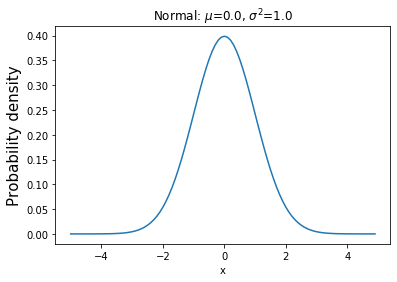

In [61]:
mu = 0 # 均值
sigma = 1 # 标准差
x = np.arange(-5,5,0.1)
y = stats.norm.pdf(x,mu,sigma)  # 生成正态分布概率函数值
plt.plot(x, y)
plt.title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu,sigma))
plt.xlabel('x')
plt.ylabel('Probability density', fontsize=15)
plt.show()

### 14.2.2 二项分布

二项分布是一种离散分布，二项是指某事件有两种可能结果，称一种为成功，另一种为失败，如抛掷硬币。一般将成功的概率记为 p，所以失败的概率为 1-p。

抛掷硬币是一个典型的二项分布，当我们计算抛掷硬币 n 次，有 k 次正面朝上的概率时，可以用二项分布表示，它的概率密度函数为：

$$
P(X=k) = C_n^kp^k(1-p)^{n-k}
$$

统计学中称抛掷一次硬币为试验，二项分布要求每次试验彼此独立，显然抛掷硬币这个事情是符合的。

二项分布是求在事件发生次数固定情况下，事件成功不同次数下的分布情况。
现在假设抛掷硬币 10 次，正面朝上的概率是 0.5，正面朝上的次数的分布如何？我们重复 10 次画图看看。

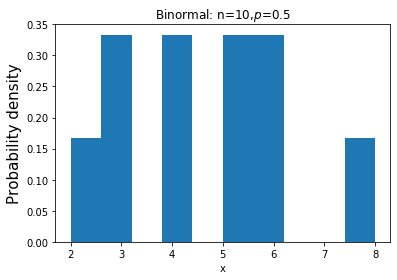

In [92]:
# 使用rvs()函数模拟一个二项随机变量
data = stats.binom.rvs(n=10,p=0.5,size=10)

plt.hist(data, density=True)
plt.xlabel('x')
plt.ylabel('Probability density', fontsize=15)
plt.title('Binormal: n=10,$p$=0.5')
plt.show()

可以看到分布非常离散，如果我们增加重复次数，如 1000 次，分布将接近正态分布。

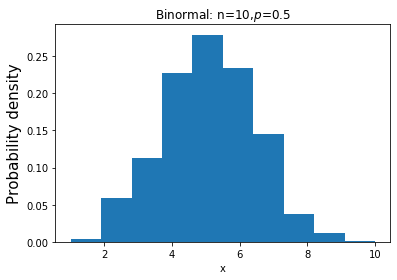

In [84]:
data = stats.binom.rvs(n=10,p=0.5,size=1000)
plt.hist(data, density=True)
plt.xlabel('x')
plt.ylabel('Probability density', fontsize=15)
plt.title('Binormal: n=10,$p$=0.5')
plt.show()

### 14.2.3 伯努利分布

伯努利分布是二项分布的特例，它是只进行了一次试验的情况，因此伯努利分布描述了具有两个结果的事件。

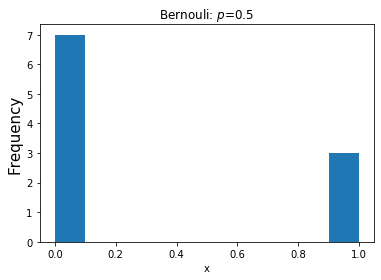

In [90]:
data = stats.bernoulli.rvs(p=0.6, size=10)
plt.hist(data)
plt.xlabel('x')
plt.ylabel('Frequency', fontsize=15)
plt.title('Bernouli: $p$=0.5')
plt.show()

### 14.2.4 指数分布

指数分布是一种连续分布，用于表示独立随机事件发生的时间间隔。如旅客进入机场的时间间隔、打进客服中心电话的时间间隔。它的概率密度函数为：

$$
f(x) = \lambda e^{-\lambda x}
$$

其中 lambda 是分布的核心参数，表示每单位事件内发生某事件的次数。

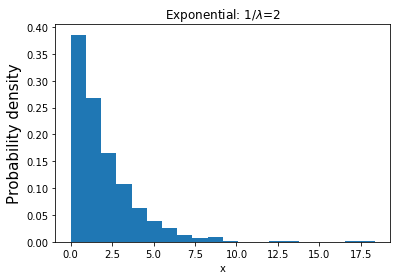

In [101]:
data = stats.expon.rvs(scale=2,size=1000) # scale参数表示λ的倒数
plt.hist(data, density=True, bins=20)
plt.xlabel('x')
plt.ylabel('Probability density', fontsize=15)
plt.title('Exponential: 1/$\lambda$=2')
plt.show()

scale 是 lambda 的倒数，也是指数分布的数学期望，即事件发生的事件间隔。

### 14.2.5 泊松分布

泊松分布是离散分布，描述了单位时间内事件发生的次数，它的核心参数也是 lambda。其概率密度函数为：

$$
P(X=k)=\frac{\lambda^k}{k!}e^{-\lambda}
$$

泊松分布的均值和方差均为 lambda。

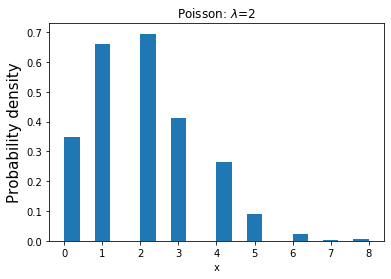

In [103]:
data = stats.poisson.rvs(mu=2,size=1000) # scale参数表示λ的倒数
plt.hist(data, density=True, bins=20)
plt.xlabel('x')
plt.ylabel('Probability density', fontsize=15)
plt.title('Poisson: $\lambda$=2')
plt.show()

## 14.3 假设检验

假设检验是对总体参数做一个尝试性假设，该假设称为原假设，然后定义一个和原假设完全对立的假设叫备择假设。其中备择假设是我们希望成立的，而原假设是我们不希望成立的。通过假设检验，如果我们发现原假设不成立，那么就可以得出备择假设的结果。

上面的术语对于没有学过统计的读者会很困惑，所以简单举例说明。现在假设存在 A 和 B 两个公司，A 公司的产品质量检测有一组数据，B 公司同样的产品质量检测也有一组数据，我们想要比较 A 公司的产品是否与 B 公司的产品有差异。读者可能会问，直接比较两组数据的均值不就好了吗？这的确是一个简单易行的办法，但它并不可靠，容易受到产品抽样或批次等因素的影响。

对于这个例子，我们可以使用假设检验进行以下的步骤：

1. 建立原假设：A 公司和 B 公司的产品质量没有差异。
2. 计算统计量和对应的概率值 p。
3. 进行判断，一般而言，p 值小于 0.05 时我们认为原假设不成立，接受备择假设。
4. 下结论：A 公司和 B 公司的产品质量有差异。

在第 2 步中，我们常计算 t 统计量。t 统计量来自于 t 分布，t 分布是一种与正态分布近似的分布。在介绍使用 t 分布进行假设检验之前，我们需要了解下 u 统计量和 t 统计量。

### 14.3.1 u 与 t 统计量

上一节我们已经绘制过标准正态分布，它有一个经验法则：正态分布有 有 69.3%的值在均值加减一个标准差的范围内，95.4%的值在两个标准差内，99.7%的值在三个标准差内。

![](https://inews.gtimg.com/newsapp_bt/0/8067114345/1000)

人们用表格的形式将正态分布一些重要位置的概率值记录了下来，然后提出了 u 变换将非标准正态分布转换为标准正态分布，这样就能照着前面表格的记录查找对应的概率了。

u 变换计算公式为：

$$
u = \frac{X - \mu}{\sigma}
$$

u 值的分布也叫 u 分布。该变换适用于数据总体均值和方差已知的情况。

一般情况下我们收集的数据都是样本数据，例如我们调查全国人民的平均身高，我们不可能全部调查和记录，而是进行抽样调查用来表示总体。因而大多数情况下总体方差是未知的，所以 t 变换出现了，它使用样本方差替换总体方差。

t 变换的计算公式为：

$$
t = \frac{x - \mu}{s/\sqrt{n}}
$$

t 值的分布也叫 t 分布，t 分布引入了自由度的概念，当样本量为 n 值，自由度为 n-1。如果 n 大于 30，t 分布逼近正态分布。

### 14.3.2 一个 t 检验实例

假设我国女性平均身高为 1.60 cm，现在从某地区随机抽取 10 名女性调查身高：1.75、1.58、1.71、1.64、1.55、1.72、1.62、1.83、1.63、1.65，请问该地区身高与全国女性平均身高是否有差异？

这里原假设为无差异，备择假设为有差异。我们使用 SciPy 提供的单样本 t 检验函数进行检验。

In [104]:
from scipy import stats
height = [1.75, 1.58, 1.71, 1.64, 1.55, 1.72, 1.62, 1.83, 1.63, 1.65]
print(stats.ttest_1samp(height, 1.60))

Ttest_1sampResult(statistic=2.550797248729806, pvalue=0.03115396848888224)


结果显示 t 统计量为 2.55，p 值为 0.03。p 值小于 0.05，说明某地区身高与全国平均身高没有差异的概率很小，所以推翻原假设，接受备择假设，下结论：该地区身高与全国女性平均身高是有差异。

### 14.3.3 两样本 t 检验

t 检验更常用于两样本的比较，如前面引入的 A 公司和 B 公司的产品质量差异。我们构造数据，设定 A 公司质量评分平均为 9，方差为 10；B 公司质量评分平均为 7，方差为 10。它们存在统计学显著的差异吗？

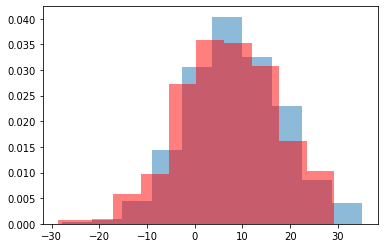

In [112]:
quality_A = stats.norm.rvs(loc = 9,scale = 10,size = 500)
quality_B = stats.norm.rvs(loc = 7,scale = 10,size = 500)

_ = plt.hist(quality_A, density=True, alpha=0.5)
_ = plt.hist(quality_B, density=True, color="red", alpha=0.5)

从图形上看，500 个评分数据大部分重叠在了一起，很难判断，我们查看 t 检验的结果。

In [113]:
print(stats.ttest_ind(quality_A, quality_B))

Ttest_indResult(statistic=2.5703785069737277, pvalue=0.010302803039144924)


p 小于 0.05，我们下结论，A 和 B 公司产品质量存在差异。

## 14.4 章末小结

本章从描述统计量、统计分布和统计检验 3 个方面的内容向读者介绍了统计分析的基本知识以及如何使用 Python 进行计算或可视化它们。掌握描述性统计量和统计分布可以帮助读者在分析时掌握数据分布的核心特性。掌握统计检验可以帮助读者从科学的角度对数据进行比较、判断并产生可靠结论。除了常用的 t 检验，还有很多其他的检验方法，包括卡方检验、非参数检验等等，读者如果感兴趣可以通过专业的统计学书籍或其他网络资料进行学习。